In [1]:
from distribution import generate_h_m_h_y
from encrypt import F, ShiftRow, MixColumn
from util import read
from scipy.stats import binom, norm
from mle import m_y_mle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
traces = read()

N: 10000
L: 6100


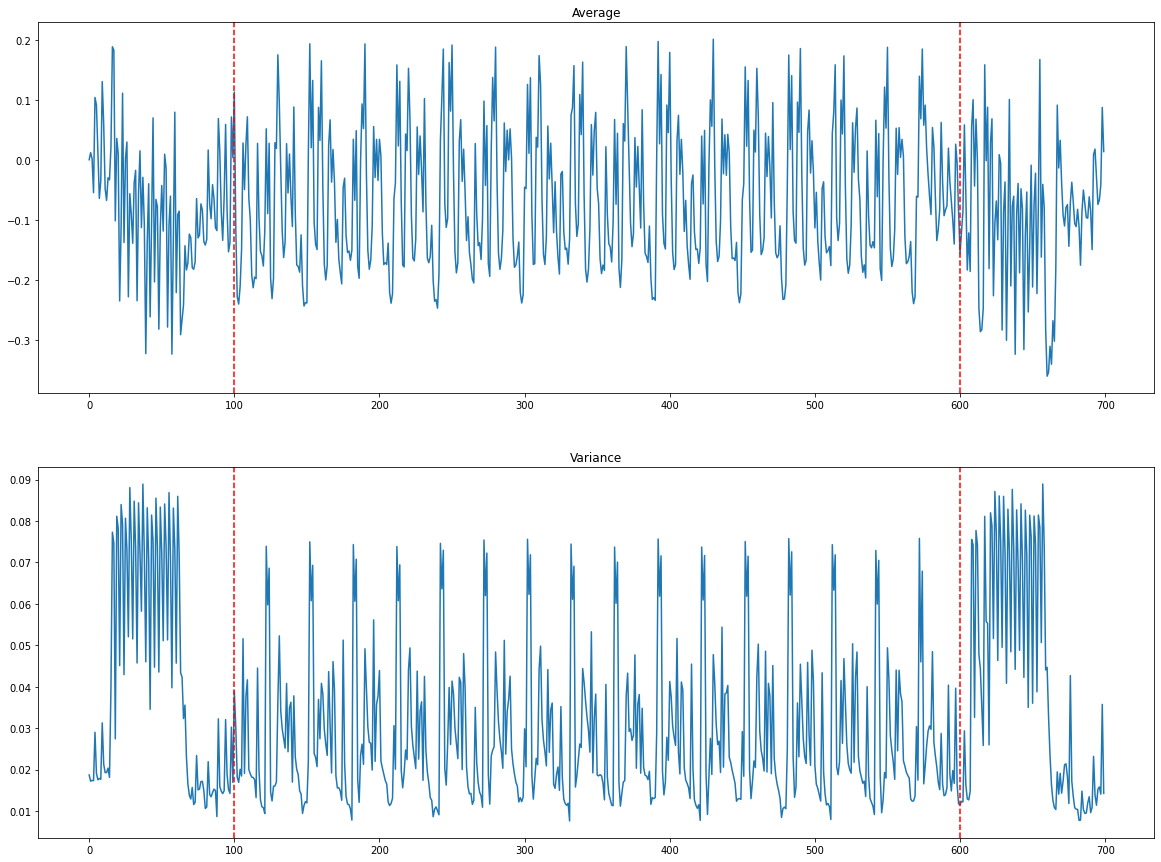

In [3]:
roiL, roiR = 900, 1600
segL, segR = 1000, 1500
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[roiL:roiR], '-')
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

In [4]:
sig = traces[:, segL:segR]
std = np.std(sig, ddof=1, axis=0)
max_idx = len(std[std > 0.065])
std_index = np.argsort(std)[::-1]

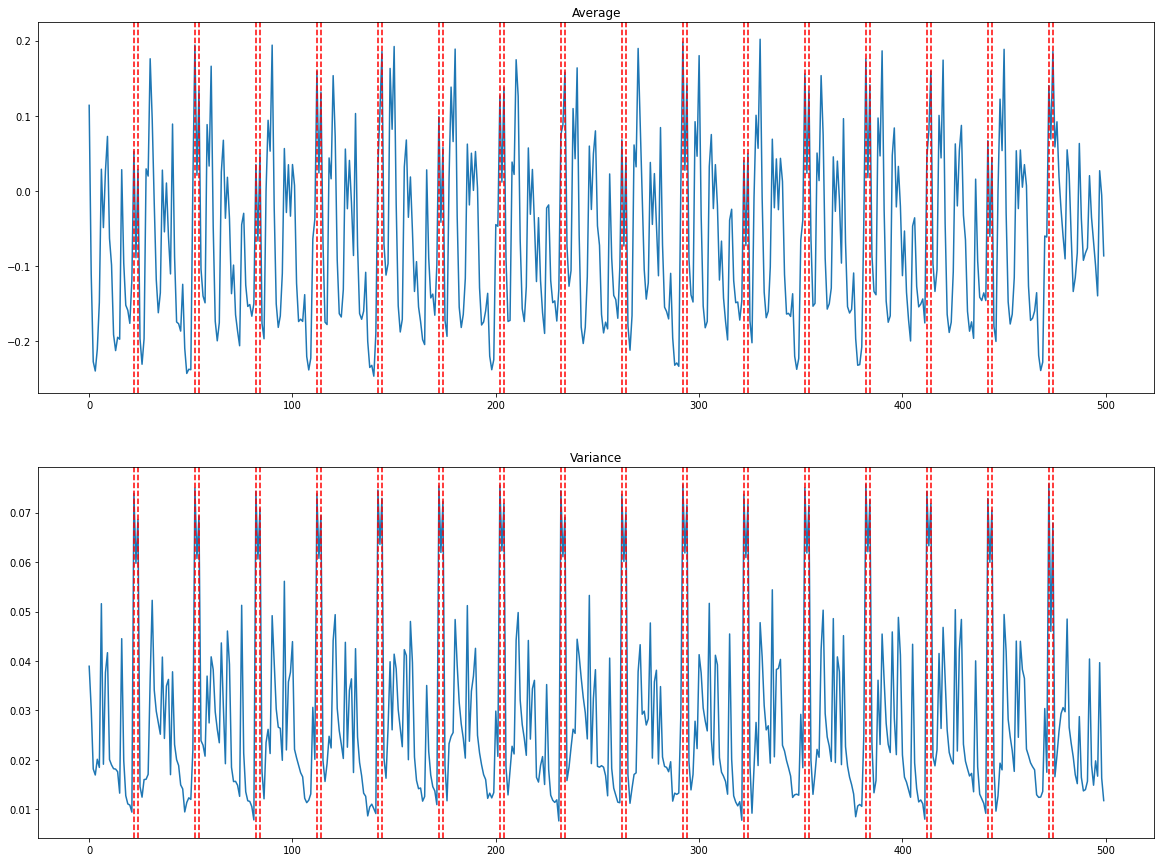

In [5]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[segL:segR])
for i in std_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[segL:segR])
for i in std_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
plt.show()

In [6]:
ids = sorted(std_index[:max_idx])
print(ids[2*14])
sig_m = sig[:, ids[2*14]] # (or 1)

442


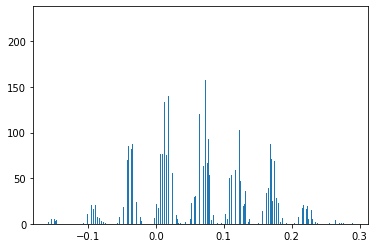

In [7]:
plt.hist(sig_m, bins=1000)
plt.show()

In [9]:
from mle import regression
regression(sig_m)

SigPoint(signal=array([ 0.1328125 ,  0.16503906,  0.125     , ..., -0.04980469,
        0.12304688,  0.10839844]), alpha=0.05126953125, beta=-0.13720703125, var_w=5.244591627398543e-05)

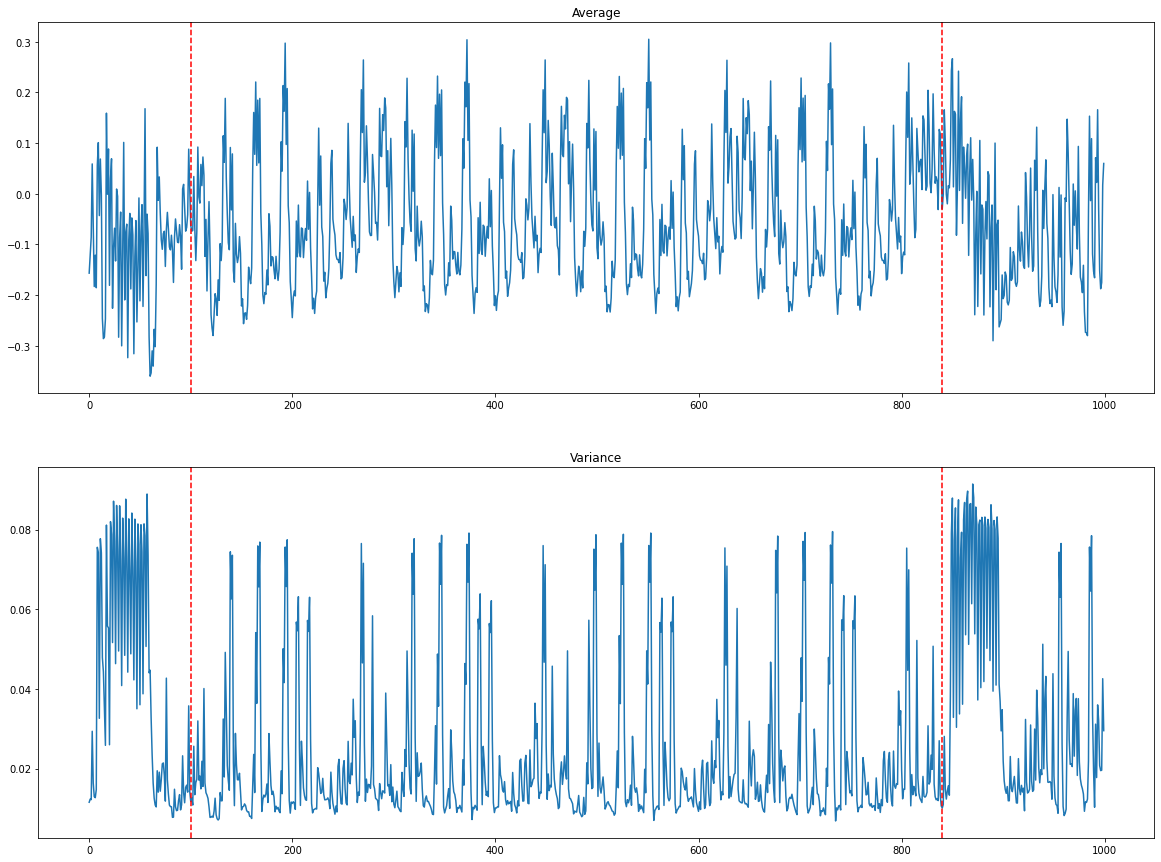

In [10]:
roiL, roiR = 1500, 2500
segL, segR = 1600, 2340
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[roiL:roiR], '-')
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

In [11]:
sig = traces[:, segL:segR]
std = np.std(sig, ddof=1, axis=0)
max_idx = len(std[std > 0.068])
std_index = np.argsort(std)[::-1]

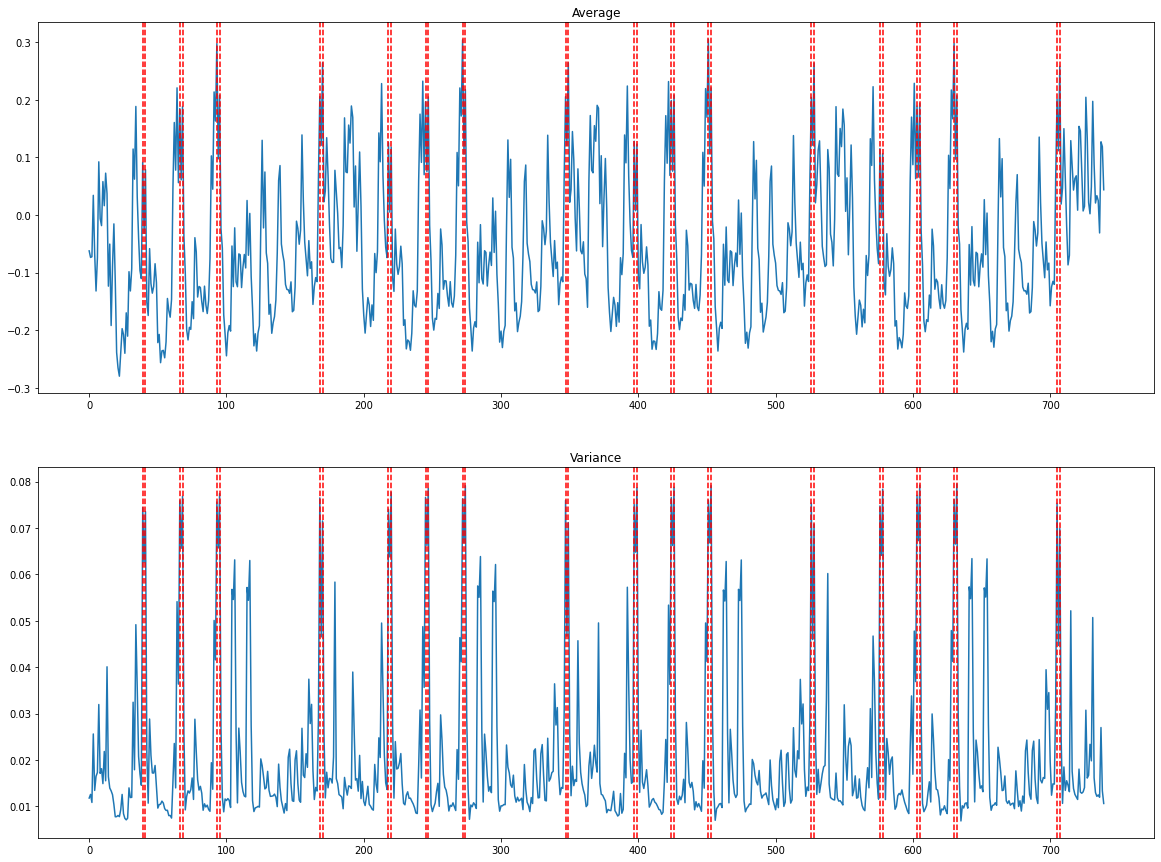

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[segL:segR])
for i in std_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[segL:segR])
for i in std_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
plt.show()

In [13]:
ids = sorted(std_index[:max_idx])
print(ids[2*14])
sig_y = sig[:, ids[2*14]] # (or 1)

630


In [14]:
regression(sig_y)

SigPoint(signal=array([0.29003906, 0.24609375, 0.23925781, ..., 0.31445312, 0.28710938,
       0.20507812]), alpha=0.048828125, beta=0.1064453125, var_w=0.0010252713701774845)

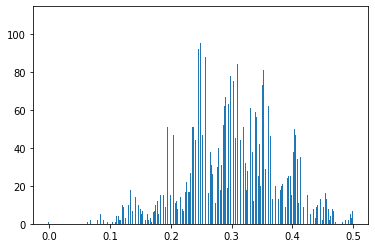

In [15]:
plt.hist(sig_y, bins=1000)
plt.show()

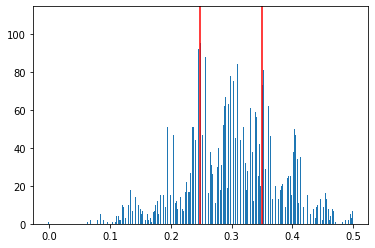

In [16]:
# regression(sig_y)
def plot_quantile(sig, n=8, p=0.5):
    q_h = np.quantile(sig, binom.cdf(n//2+1, n, p) - binom.pmf(n//2+1, n, p) / 2)
    q_l = np.quantile(sig, binom.cdf(n//2-1, n, p) - binom.pmf(n//2-1, n, p) / 2)
    plt.hist(sig, bins=1000)
    plt.axvline(q_h, color='red')
    plt.axvline(q_l, color='red')
plot_quantile(sig_y)

In [17]:
regression(sig_m)

SigPoint(signal=array([ 0.1328125 ,  0.16503906,  0.125     , ..., -0.04980469,
        0.12304688,  0.10839844]), alpha=0.05126953125, beta=-0.13720703125, var_w=5.244591627398543e-05)

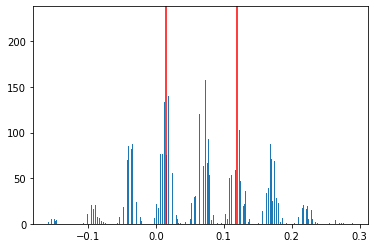

In [18]:
plot_quantile(sig_m)

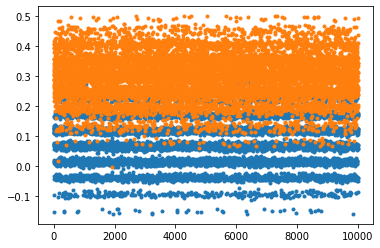

In [16]:
plt.plot(sig_m, '.')
plt.plot(sig_y, '.')

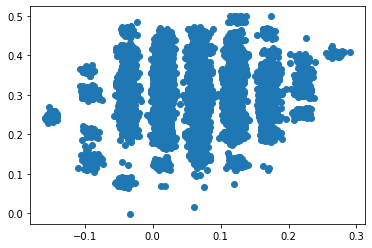

In [17]:
plt.scatter(sig_m, sig_y)

In [80]:
j = 2
def func(i, k):
    subPT = np.array([i] * 4, dtype=np.uint8)
    subMK = np.array([k] * 4, dtype=np.uint8)
    o = F(subPT, subMK)[j]
    return o
h_m_h_y = generate_h_m_h_y(func)
keys, probs = m_y_mle(sig_m, sig_y, h_m_h_y)

/tmp/ipykernel_40658/4260292614.py:53: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(h_given_k(h_m, h_y, h_m_h_y, sigma_m, sigma_y)), axis=-1)


<AxesSubplot:>

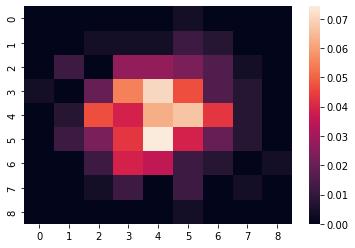

In [88]:
import seaborn as sns
sns.heatmap(h_m_h_y[10])

In [89]:
h_m_h_y[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00390625, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00390625, 0.00390625, 0.00390625,
        0.01171875, 0.0078125 , 0.        , 0.        ],
       [0.        , 0.01171875, 0.        , 0.02734375, 0.02734375,
        0.0234375 , 0.015625  , 0.00390625, 0.        ],
       [0.00390625, 0.        , 0.01953125, 0.0546875 , 0.0703125 ,
        0.046875  , 0.015625  , 0.0078125 , 0.        ],
       [0.        , 0.0078125 , 0.046875  , 0.0390625 , 0.0625    ,
        0.06640625, 0.04296875, 0.0078125 , 0.        ],
       [0.        , 0.01171875, 0.0234375 , 0.04296875, 0.07421875,
        0.0390625 , 0.01953125, 0.0078125 , 0.        ],
       [0.        , 0.        , 0.01171875, 0.0390625 , 0.03515625,
        0.01171875, 0.0078125 , 0.        , 0.00390625],
       [0.        , 0.        , 0.00390625, 0.01171875, 0.        ,
        0.01171875, 0.        , 0.00390625, 0.        ],
